In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass=pd.read_csv("E:\\itsstudytym\\assignments\\KNN\\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
X=glass.iloc[:,:-1]
y=glass['Type']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

## UnserSampling

In [15]:
from imblearn.under_sampling import NearMiss
nm=NearMiss(version=1)
X_res,y_res=nm.fit_sample(X,y)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
error=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_res,y_res)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error')

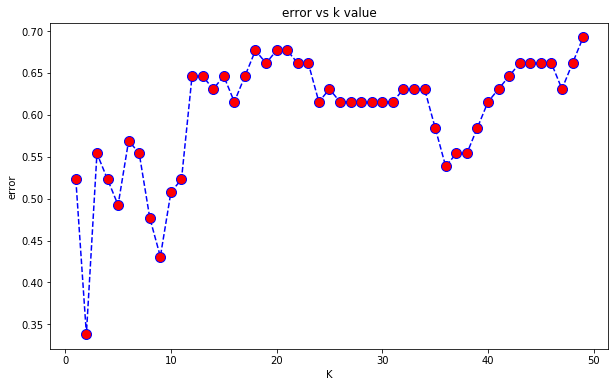

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',marker='o',markersize=10,linestyle='dashed',markerfacecolor='red')
plt.title('error vs k value')
plt.xlabel('K')
plt.ylabel('error')

## SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm=SMOTE(random_state=2)

In [35]:
X_Res, y_Res = sm.fit_sample(X_train,y_train.ravel())

In [37]:
X_Res.shape

(312, 9)

In [38]:
error=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Res,y_Res)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error')

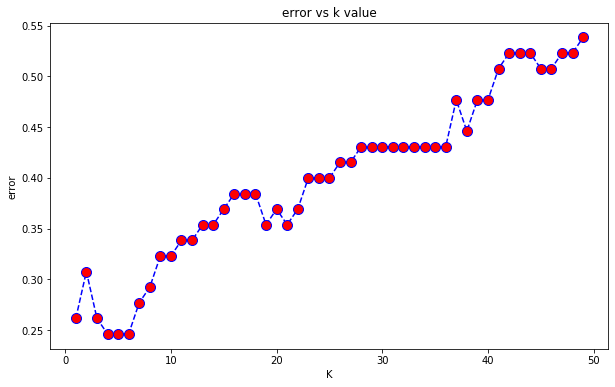

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',marker='o',markersize=10,linestyle='dashed',markerfacecolor='red')
plt.title('error vs k value')
plt.xlabel('K')
plt.ylabel('error')

In [40]:
knn=KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(X_Res,y_Res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
pred=knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, accuracy_score

In [44]:
accuracy_score(y_test,pred)

0.7538461538461538

In [45]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           1       0.70      0.74      0.72        19\n           2       0.83      0.79      0.81        24\n           3       0.67      0.80      0.73         5\n           5       0.71      1.00      0.83         5\n           6       0.67      0.67      0.67         3\n           7       0.83      0.56      0.67         9\n\n    accuracy                           0.75        65\n   macro avg       0.73      0.76      0.74        65\nweighted avg       0.76      0.75      0.75        65\n'